In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset = pd.read_csv("student_loan_eligibility_dataset.csv")

In [3]:
dataset.head()

,Age,Income,Credit_Score,Employment_Status,Previous_Loan_Default,Loan_Eligibility
0,21,23278,640,Unemployed,0,No
1,22,33434,846,Employed,0,Yes
2,31,24165,515,Unemployed,0,No
3,25,86237,808,Unemployed,0,No
4,35,74987,612,Student,1,No


In [4]:
dataset.shape

(10000, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    10000 non-null  int64 
 1   Income                 10000 non-null  int64 
 2   Credit_Score           10000 non-null  int64 
 3   Employment_Status      10000 non-null  object
 4   Previous_Loan_Default  10000 non-null  int64 
 5   Loan_Eligibility       10000 non-null  object
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [6]:
dataset.describe()

,Age,Income,Credit_Score,Previous_Loan_Default
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.494800,54907.733200,675.871000,0.502100
std,5.198353,20245.377573,101.409761,0.500021
min,18.000000,20011.000000,500.000000,0.000000
25%,22.000000,37481.750000,588.000000,0.000000
50%,26.000000,54821.500000,676.000000,1.000000
75%,31.000000,72678.000000,762.000000,1.000000
max,35.000000,89993.000000,850.000000,1.000000


In [7]:
pd.crosstab(dataset['Credit_Score'], dataset['Loan_Eligibility'], margins = True)

Loan_Eligibility,No,Yes,All
Credit_Score,,,
500,27,0,27
501,30,0,30
502,31,0,31
503,34,0,34
504,32,0,32
...,...,...,...
847,24,2,26
848,31,3,34
849,27,8,35


<AxesSubplot:>

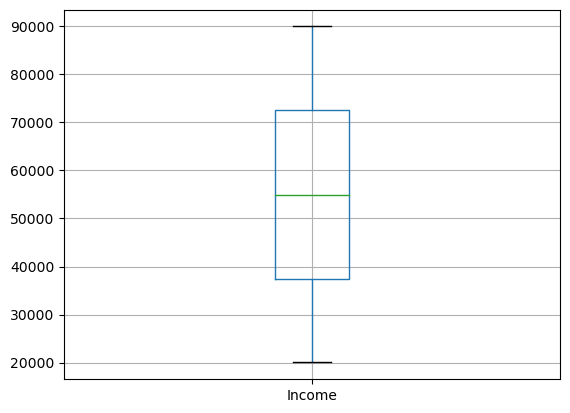

In [8]:
dataset.boxplot(column='Income')

<AxesSubplot:>

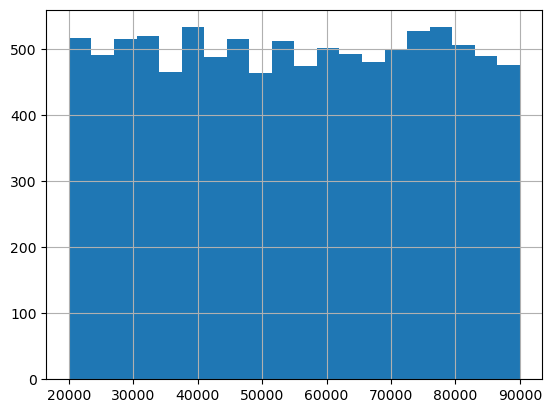

In [9]:
dataset['Income'].hist(bins=20)

In [10]:
pd.crosstab(dataset['Previous_Loan_Default'], dataset['Loan_Eligibility'], margins = True)

Loan_Eligibility,No,Yes,All
Previous_Loan_Default,,,
0,4245,734,4979
1,5021,0,5021
All,9266,734,10000


In [11]:
X = dataset.drop('Loan_Eligibility', axis=1)   #independent variables(Age, Income, Credit_Score, Employment_Status, Previous_Loan_Default)
Y = dataset['Loan_Eligibility']           #dependent variables(Loan_Eligibility)

In [12]:
X

,Age,Income,Credit_Score,Employment_Status,Previous_Loan_Default
0,21,23278,640,Unemployed,0
1,22,33434,846,Employed,0
2,31,24165,515,Unemployed,0
3,25,86237,808,Unemployed,0
4,35,74987,612,Student,1
...,...,...,...,...,...
9995,25,41113,842,Employed,0
9996,33,23949,551,Student,0
9997,29,28096,847,Student,0
9998,29,32792,817,Employed,1


In [13]:
Y

0        No
1       Yes
2        No
3        No
4        No
       ... 
9995    Yes
9996     No
9997     No
9998     No
9999     No
Name: Loan_Eligibility, Length: 10000, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
print(X_train)

      Age  Income  Credit_Score Employment_Status  Previous_Loan_Default
7389   34   62831           753          Employed                      0
9275   28   26544           560          Employed                      1
2995   23   22615           800          Employed                      1
5316   26   42789           527          Employed                      1
356    20   73242           686          Employed                      0
...   ...     ...           ...               ...                    ...
9225   31   86179           559           Student                      0
4859   26   65265           719           Student                      0
3264   31   39289           730          Employed                      0
9845   27   58145           633           Student                      1
2732   21   78090           675          Employed                      0

[8000 rows x 5 columns]


In [16]:
print(Y_train)

7389     No
9275     No
2995     No
5316     No
356     Yes
       ... 
9225     No
4859     No
3264     No
9845     No
2732    Yes
Name: Loan_Eligibility, Length: 8000, dtype: object


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier()

In [19]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [32]:
print(X_train_encoded.columns)

Index(['Age', 'Income', 'Credit_Score', 'Previous_Loan_Default',
       'Employment_Status_Employed', 'Employment_Status_Student',
       'Employment_Status_Unemployed'],
      dtype='object')


In [33]:
print(X_train_encoded)


      Age  Income  Credit_Score  Previous_Loan_Default  \
7389   34   62831           753                      0   
9275   28   26544           560                      1   
2995   23   22615           800                      1   
5316   26   42789           527                      1   
356    20   73242           686                      0   
...   ...     ...           ...                    ...   
9225   31   86179           559                      0   
4859   26   65265           719                      0   
3264   31   39289           730                      0   
9845   27   58145           633                      1   
2732   21   78090           675                      0   

      Employment_Status_Employed  Employment_Status_Student  \
7389                           1                          0   
9275                           1                          0   
2995                           1                          0   
5316                           1                   

In [21]:
clf.fit(X_train_encoded, Y_train)

DecisionTreeClassifier()

In [22]:
Y_pred = clf.predict(X_test_encoded)

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
#'Age', 'Income', 'Credit_Score', 'Previous_Loan_Default','Employment_Status_Employed', 'Employment_Status_Student','Employment_Status_Unemployed'

In [44]:
result = clf.predict([[18, 35000, 650, 0, 1, 0, 0]])
print(result)

['Yes']


c:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
